In [1]:
import pandas as pd
df = pd.read_csv('datasets/heart.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.shape

(918, 12)

In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df['FastingBS'].unique()

array([0, 1])

In [9]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [10]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [11]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [12]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [13]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [14]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

In [15]:
import matplotlib.pyplot as plt

In [16]:
class_counts = y.value_counts()

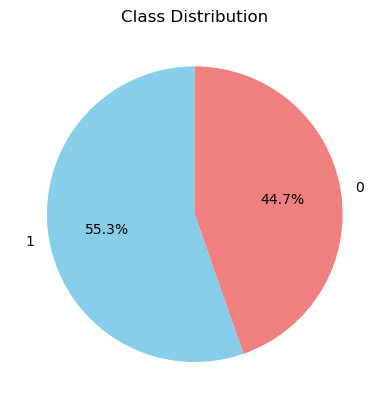

In [17]:
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

For OrdinalEncoder:

1.   Sex
2.   ExerciseAngina
3.   ST_Slope

For OneHotEncoder:


1.   ChestPainType
2.   RestingECG

For StandardScaler:


1.   Age
2.   RestingBP
3.   Cholesterol
4.   MaxHR

In [18]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [19]:
to_ode = ['Sex','ST_Slope','ExerciseAngina']
to_ohe = ['ChestPainType','RestingECG']
to_scale = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

In [20]:
ode = OrdinalEncoder()
ohe = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

In [21]:
ct = make_column_transformer(
    (ode, to_ode),
    (ohe, to_ohe),
    (scaler, to_scale),
    remainder='passthrough'
)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = RandomForestClassifier()

In [24]:
from sklearn.pipeline import Pipeline

In [25]:
pipeline = Pipeline(
    steps = [
        ('ct', ct),
        ('model', model)
    ]
)

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cvs = cross_val_score(pipeline, X, y, cv=10)

In [28]:
cvs

array([0.88043478, 0.93478261, 0.85869565, 0.91304348, 0.85869565,
       0.85869565, 0.89130435, 0.79347826, 0.78021978, 0.83516484])

In [29]:
import numpy as np

In [30]:
np.average(cvs)

np.float64(0.8604515050167224)

In [31]:
np.std(cvs)

np.float64(0.04605808044402226)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [34]:
pipeline.fit(X_train, y_train)

,steps,"[('ct', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ordinalencoder', ...), ('onehotencoder', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
y_pred = pipeline.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
score = classification_report(y_test, y_pred)

In [38]:
print(score)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {
    'model__n_estimators': [500, 1000, 1500],
    'model__max_depth': [10, 20, 30, None],
    'model__criterion': ['gini','entropy'],
    'model__min_samples_split': [5, 10, 15],
    'model__min_samples_leaf': [1, 2, 4], 
    'model__max_features': ['sqrt', 'log2']
}

In [41]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [42]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END model__criterion=gini, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500; total time=   0.5s
[CV] END model__criterion=gini, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500; total time=   0.5s
[CV] END model__criterion=gini, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500; total time=   0.5s
[CV] END model__criterion=gini, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500; total time=   0.5s
[CV] END model__criterion=gini, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500; total time=   0.5s
[CV] END model__criterion=gini, model__max_dep

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'model__criterion': ['gini', 'entropy'], 'model__max_depth': [10, 20, ...], 'model__max_features': ['sqrt', 'log2'], 'model__min_samples_leaf': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('ordinalencoder', ...), ('onehotencoder', ...), ...]"


In [43]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross Validation Score:", grid_search.best_score_)

Best Parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 500}
Best Cross Validation Score: 0.8760134190662565


In [44]:
best_pipeline = grid_search.best_estimator_

In [45]:
y_pred_best = best_pipeline.predict(X_test)

In [46]:
best_score = classification_report(y_test, y_pred)

In [47]:
print(best_score)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        77
           1       0.92      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



Prediction Accuracy: 88%

Deep Learning

In [39]:
import torch
from torch import nn
import numpy as np

In [40]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [41]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  2.28435288,
        -0.09706109,  1.        ],
       [ 1.        ,  2.        ,  0.        , ...,  1.65224147,
        -0.83628643,  0.        ],
       [ 1.        ,  1.        ,  1.        , ..., -0.44162756,
         0.08774524,  1.        ],
       ...,
       [ 1.        ,  2.        ,  1.        , ...,  0.30900473,
         0.45735791,  0.        ],
       [ 1.        ,  2.        ,  1.        , ..., -0.7181763 ,
        -0.83628643,  0.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.24409275,
         1.01177691,  0.        ]], shape=(734, 16))

In [42]:
X_test

array([[ 0.        ,  2.        ,  0.        , ...,  1.69174843,
        -0.83628643,  0.        ],
       [ 1.        ,  1.        ,  0.        , ..., -0.24409275,
        -0.83628643,  0.        ],
       [ 1.        ,  1.        ,  0.        , ..., -0.56014845,
         0.27255158,  1.        ],
       ...,
       [ 1.        ,  1.        ,  1.        , ..., -0.79719023,
         0.54976108,  1.        ],
       [ 1.        ,  2.        ,  0.        , ...,  1.37569273,
        -0.28186743,  0.        ],
       [ 1.        ,  1.        ,  1.        , ..., -0.56014845,
         0.08774524,  0.        ]], shape=(184, 16))

In [43]:
X_train = torch.tensor(X_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_train = torch.tensor(y_train.values.reshape(-1,1), dtype = torch.float32)
y_test = torch.tensor(y_test.values.reshape(-1,1), dtype = torch.float32)

In [44]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

tensor([[ 1.0000,  0.0000,  0.0000,  ...,  2.2844, -0.0971,  1.0000],
        [ 1.0000,  2.0000,  0.0000,  ...,  1.6522, -0.8363,  0.0000],
        [ 1.0000,  1.0000,  1.0000,  ..., -0.4416,  0.0877,  1.0000],
        ...,
        [ 1.0000,  2.0000,  1.0000,  ...,  0.3090,  0.4574,  0.0000],
        [ 1.0000,  2.0000,  1.0000,  ..., -0.7182, -0.8363,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  ..., -0.2441,  1.0118,  0.0000]])
tensor([[ 0.0000,  2.0000,  0.0000,  ...,  1.6917, -0.8363,  0.0000],
        [ 1.0000,  1.0000,  0.0000,  ..., -0.2441, -0.8363,  0.0000],
        [ 1.0000,  1.0000,  0.0000,  ..., -0.5601,  0.2726,  1.0000],
        ...,
        [ 1.0000,  1.0000,  1.0000,  ..., -0.7972,  0.5498,  1.0000],
        [ 1.0000,  2.0000,  0.0000,  ...,  1.3757, -0.2819,  0.0000],
        [ 1.0000,  1.0000,  1.0000,  ..., -0.5601,  0.0877,  0.0000]])
tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [45]:
device = 'mps' if torch.mps.is_available() else 'cpu'
device

'mps'

In [46]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [47]:
print(X_test.device, X_train.device, y_train.device, y_test.device)

mps:0 mps:0 mps:0 mps:0


In [48]:
def accuracy(y_true, y_pred):
    y_pred_labels = (y_pred >= 0.5).float()
    correct = torch.eq(y_true, y_pred_labels).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [65]:
class NeuralNetwork_0(nn.Module):
    def __init__(self, input):
        super().__init__()
        self.layer_1 = nn.Linear(input, 64)
        self.layer_2 = nn.Linear(64, 32)
        self.layer_3 = nn.Linear(32, 16)
        self.layer_4 = nn.Linear(16, 8)
        self.layer_5 = nn.Linear(8, 1)


        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.dropout(x)

        x = self.relu(self.layer_2(x))
        x = self.dropout(x)

        x = self.relu(self.layer_3(x))
        x = self.dropout(x)

        x = self.relu(self.layer_4(x))
        x = self.dropout(x)

        x = self.sigmoid(self.layer_5(x))
        return x

In [66]:
input = X_train.shape[1]
input

16

In [67]:
nn_model_0 = NeuralNetwork_0(input).to(device)
nn_model_0

NeuralNetwork_0(
  (layer_1): Linear(in_features=16, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (layer_4): Linear(in_features=16, out_features=8, bias=True)
  (layer_5): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.3, inplace=False)
)

In [68]:
criterion = nn.BCELoss()
criterion

BCELoss()

In [69]:
optimizer = torch.optim.Adam(params = nn_model_0.parameters(), lr = 0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [70]:
def plot_loss_curves(epoch_count, loss_values, test_loss_values):
    train_loss = np.array(torch.tensor(loss_values).numpy())
    test_loss = np.array(torch.tensor(test_loss_values).numpy())
    
    plt.figure(figsize=(8, 6))
    plt.plot(epoch_count, train_loss, label='Training Loss')
    plt.plot(epoch_count, test_loss, label='Testing Loss')
    plt.title('Testing and Training Loss Curves')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

In [71]:
def plot_accuracy(epoch_count, train_accuracy_values, test_accuracy_values):
    plt.figure(figsize=(10, 5))

    train_acc = np.array(train_accuracy_values)
    test_acc = np.array(test_accuracy_values)

    if train_acc.max() > 1:
        train_acc = train_acc / 100
    if test_acc.max() > 1:
        test_acc = test_acc / 100

    plt.plot(epoch_count, train_acc, label='Training Accuracy', color='green')
    plt.plot(epoch_count, test_acc, label='Testing Accuracy', color='orange')

    plt.title('Training and Testing Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch: 0 | Loss: 0.7210 | Testing Loss: 0.7296 | Accuracy: 45.37 | Testing Accuracy: 41.85
Epoch: 20 | Loss: 0.6985 | Testing Loss: 0.7041 | Accuracy: 45.78 | Testing Accuracy: 41.85
Epoch: 40 | Loss: 0.6259 | Testing Loss: 0.6220 | Accuracy: 74.39 | Testing Accuracy: 75.54
Epoch: 60 | Loss: 0.5114 | Testing Loss: 0.4895 | Accuracy: 78.75 | Testing Accuracy: 78.26
Epoch: 80 | Loss: 0.4664 | Testing Loss: 0.4238 | Accuracy: 83.51 | Testing Accuracy: 84.24
Epoch: 100 | Loss: 0.4303 | Testing Loss: 0.3938 | Accuracy: 84.88 | Testing Accuracy: 84.78
Epoch: 120 | Loss: 0.4100 | Testing Loss: 0.3866 | Accuracy: 85.01 | Testing Accuracy: 84.78
Epoch: 140 | Loss: 0.4001 | Testing Loss: 0.3789 | Accuracy: 84.60 | Testing Accuracy: 84.24
Epoch: 160 | Loss: 0.3951 | Testing Loss: 0.3647 | Accuracy: 86.51 | Testing Accuracy: 85.33
Epoch: 180 | Loss: 0.3823 | Testing Loss: 0.3570 | Accuracy: 86.24 | Testing Accuracy: 85.87
Epoch: 200 | Loss: 0.3545 | Testing Loss: 0.3450 | Accuracy: 88.69 | Testing

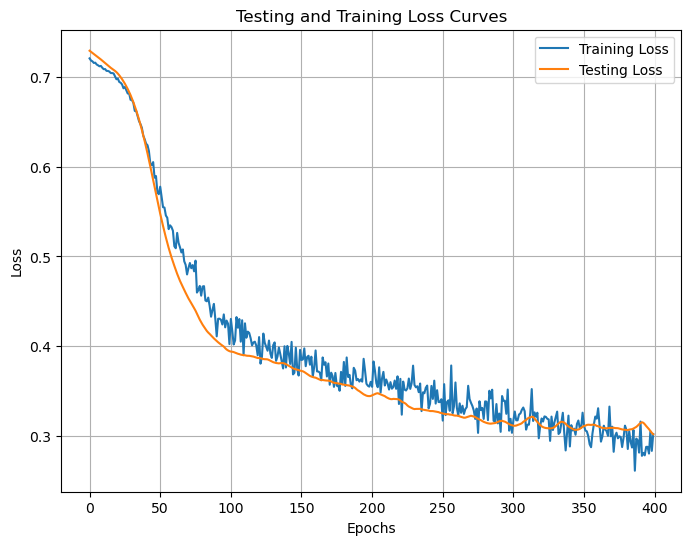

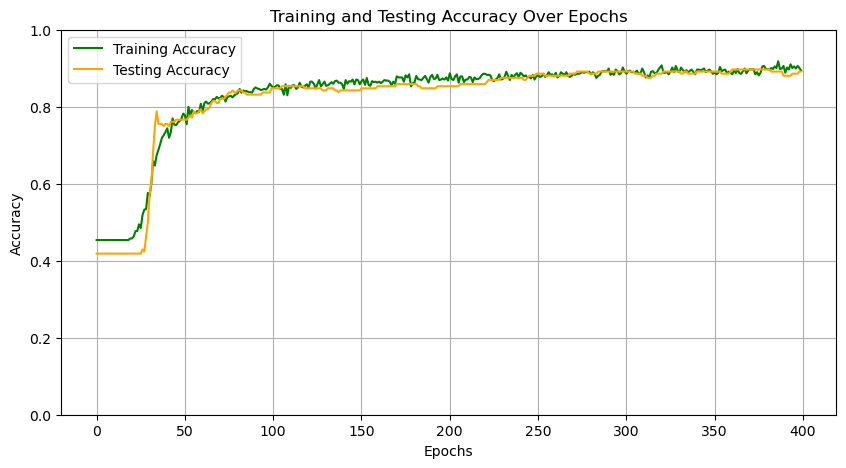

In [72]:
torch.manual_seed(42)
torch.mps.manual_seed(42)

epoch_count, loss_values, test_loss_values = [], [], []
train_accuracy_values, test_accuracy_values = [], []

epochs = 400

for epoch in range(epochs):
    nn_model_0.train()
    y_pred_nn = nn_model_0(X_train)
    loss = criterion(y_pred_nn, y_train)
    acc = accuracy(y_train, y_pred_nn)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    nn_model_0.eval()
    with torch.inference_mode():
        y_pred_nn_test = nn_model_0(X_test)
        loss_test = criterion(y_pred_nn_test, y_test)
        acc_test = accuracy(y_test, y_pred_nn_test)

        epoch_count.append(epoch)
        loss_values.append(loss.item())
        test_loss_values.append(loss_test.item())
        train_accuracy_values.append(acc)
        test_accuracy_values.append(acc_test)
        

    if epoch % 20 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.4f} | Testing Loss: {loss_test:.4f} | Accuracy: {acc:.2f} | Testing Accuracy: {acc_test:.2f}')

plot_loss_curves(epoch_count, loss_values, test_loss_values)
plot_accuracy(epoch_count, train_accuracy_values, test_accuracy_values)

Prediction Accuracy: 89%

In [73]:
nn_model_0.eval()

with torch.inference_mode():
    y_predicted = torch.round(nn_model_0(X_test)).squeeze()

print(y_predicted[:10])
print(y_test[:10])

tensor([0., 1., 1., 1., 0., 1., 1., 0., 1., 1.], device='mps:0')
tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.]], device='mps:0')


In [74]:
nn_model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.2976,  0.1023, -0.0163,  ...,  0.0339,  0.1541, -0.0475],
                      [ 0.3543, -0.0141, -0.0811,  ..., -0.1439,  0.3967, -0.2682],
                      [-0.0245,  0.1950, -0.2029,  ..., -0.0836,  0.0198, -0.0337],
                      ...,
                      [-0.2852,  0.3122,  0.1813,  ..., -0.1135,  0.0187,  0.2810],
                      [ 0.0977, -0.3217,  0.2132,  ..., -0.1106, -0.1130,  0.1038],
                      [-0.0832, -0.1878,  0.1735,  ..., -0.0576, -0.3930,  0.2010]],
                     device='mps:0')),
             ('layer_1.bias',
              tensor([-0.0176, -0.1251,  0.0510, -0.1276, -0.0441, -0.0919,  0.0674, -0.0575,
                      -0.0732, -0.2609, -0.0686,  0.1955,  0.0715, -0.1650,  0.0238, -0.0802,
                      -0.1411,  0.1312,  0.0559,  0.0230, -0.1665, -0.1099, -0.0204,  0.0498,
                      -0.0040, -0.1623,  0.1828, -0.0561, -0.1339, -0.1276,  0.2725, 

Fixed some problematic overfitting issues

Developing another model soon

Saving Model

In [75]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'heart_failure_02_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/heart_failure_02_model.pth')

In [76]:
torch.save(obj=nn_model_0.state_dict(), f=MODEL_SAVE_PATH)

In [77]:
loaded_model_0 = NeuralNetwork_0(input)
loaded_model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1911,  0.2075, -0.0586,  ...,  0.0339,  0.1205, -0.0353],
                      [ 0.1927,  0.0370, -0.1167,  ..., -0.2469,  0.2258, -0.2124],
                      [ 0.1930,  0.0416, -0.0812,  ..., -0.1093,  0.1443,  0.0447],
                      ...,
                      [-0.0973,  0.1566,  0.2038,  ..., -0.0516, -0.0209,  0.1125],
                      [-0.0420, -0.2099,  0.2000,  ..., -0.1155, -0.0842, -0.0939],
                      [-0.1044, -0.0674,  0.0650,  ..., -0.0954, -0.2149, -0.1582]])),
             ('layer_1.bias',
              tensor([ 1.3925e-01, -3.7330e-02,  1.0618e-01, -1.4675e-01,  3.7990e-02,
                      -1.5121e-01,  1.2497e-01, -1.0934e-01, -6.2690e-02, -2.1691e-01,
                       8.2588e-04,  2.3737e-01,  1.2134e-01, -1.3339e-01,  3.3622e-03,
                      -2.7412e-02, -2.0127e-01,  1.9602e-01,  4.0302e-03,  5.2649e-02,
                      -1.0096e-01, -1.1698e-01,  4.1222e

In [78]:
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

/var/folders/_2/_yhjp4h153l3658w2fh53v580000gn/T/ipykernel_15178/1920488290.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(MOD

<All keys matched successfully>

In [79]:
loaded_model_0.to(device)
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_preds = torch.round(loaded_model_0(X_test)).squeeze()

loaded_model_0_preds

tensor([0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
        1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
        1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
        1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
        1., 1., 0., 1.], device='mps:0')

In [80]:
loaded_model_0_preds == y_predicted

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr